# Problem Statement

#### MOVIE RATING PREDICTION WITH PYTHON
- Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem. 
- The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.
- Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately

## Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load The Data

In [2]:
data = pd.read_csv('IMDb Movies India.csv', encoding='latin1')
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
data.shape

(15509, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


## Exploratory Data Analysis (EDA):

In [6]:
# Display unique values in categorical features

print(data['Genre'].unique())

['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family, Musical'
 'Act

In [7]:
print(data['Genre'].value_counts().head(10).index)

Index(['Drama', 'Action', 'Thriller', 'Romance', 'Drama, Romance', 'Comedy',
       'Action, Crime, Drama', 'Drama, Family', 'Horror', 'Action, Drama'],
      dtype='object', name='Genre')


In [8]:
print(data['Director'].unique())

['J.S. Randhawa' 'Gaurav Bakshi' 'Soumyajit Majumdar' ... 'Mozez Singh'
 'Ved Prakash' 'Kiran Thej']


In [9]:
print(data['Actor 1'].unique())

['Manmauji' 'Rasika Dugal' 'Sayani Gupta' ... 'Meghan Jadhav'
 'Roohi Berde' 'Sangeeta Tiwari']


In [10]:
print(data['Actor 2'].unique())

['Birbal' 'Vivek Ghamande' 'Plabita Borthakur' ... 'Devan Sanjeev'
 'Prince Daniel' 'Sarah Jane Dias']


In [11]:
print(data['Actor 3'].unique())

['Rajendra Bhatia' 'Arvind Jangid' 'Roy Angana' ... 'Shatakshi Gupta'
 'Valerie Agha' 'Suparna Anand']


## Data Visulization & Data Cleaning& Data Preprocessing

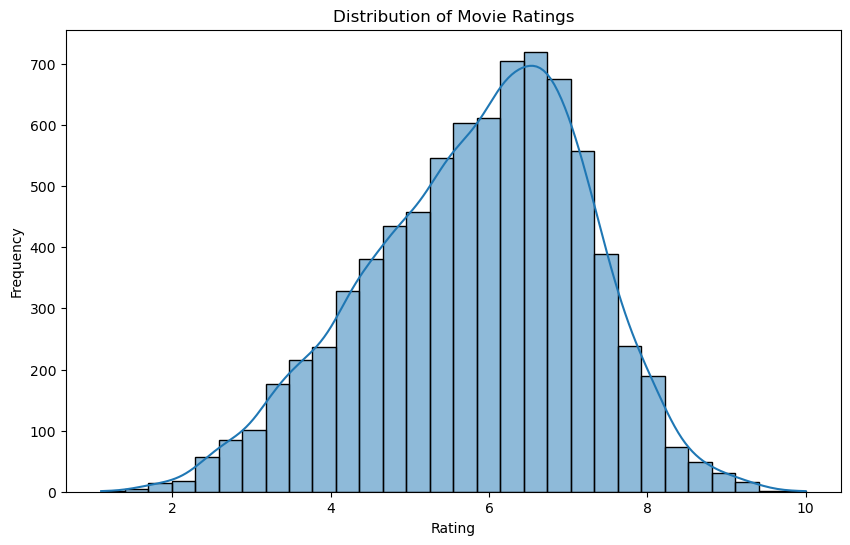

In [12]:
# Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Checking for missing values
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [14]:
data.duplicated().sum()

6

In [15]:
# Fill missing values (if any)
data.dropna(inplace=True)
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [16]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [17]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [18]:
# Data Preprocessing

In [19]:
data['Year']= data['Year'].str.replace(r'[()]','',regex=True).astype(int)

In [20]:
data['Duration'] = pd.to_numeric(data['Duration'].str.replace('min',''))

In [21]:
data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',',''))

In [22]:
data['Genre']= data['Genre'].str.split(', ')

In [23]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,[Drama],7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"[Comedy, Romance]",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"[Comedy, Drama, Musical]",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"[Drama, Romance, War]",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"[Horror, Mystery, Thriller]",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,[Drama],6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"[Biography, Drama, History]",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"[Action, Crime, Drama]",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"[Action, Drama]",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [24]:
data = data.explode('Genre')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [25]:
data['Genre'].fillna(data['Genre'].mode()[0],inplace=True)
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


## Define the Preprocessing and Modeling Pipeline

In [26]:
# Define numerical and categorical columns
numerical_features = ['Year', 'Duration', 'Votes']
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [28]:
# Preprocessing for numerical data: impute missing values with the median
numerical_transformer = SimpleImputer(strategy='median')
numerical_transformer

SimpleImputer(strategy='median')

In [29]:
# Preprocessing for categorical data: impute missing values with the most frequent value and apply one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [30]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', SimpleImputer(strategy='median'),
                                 ['Year', 'Duration', 'Votes']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Genre', 'Director', 'Actor 1', 'Actor 2',
                                  'Actor 3'])])

## Split the data into features and target

In [31]:
# Separate features and target
X = data.drop(columns='Rating')
y = data['Rating']

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Define the model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# Define the model
from sklearn.linear_model import LinearRegression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Year', 'Duration',
                                                   'Votes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor', LinearRegression())])

In [35]:
# Train the model:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Year', 'Duration',
                                                   'Votes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor', LinearRegression())])

## Make predictions and evaluate the model

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [37]:
y_pred = model.predict(X_test)
y_pred

array([4.58664777, 6.57656259, 6.60032329, ..., 5.13382984, 3.54447672,
       6.12858745])

In [38]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.9919298838600817
Mean Absolute Error: 0.7721391189599349
R-squared: 0.4760137535877279


In [39]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [40]:
Avg_rate_by_year = data.groupby(['Year','Genre'])['Rating'].mean().reset_index()
Avg_rate_by_year

,Year,Genre,Rating
0,1931,Drama,5.750000
1,1931,Fantasy,6.200000
2,1932,Musical,6.000000
3,1932,Romance,6.000000
4,1933,Drama,6.200000
...,...,...,...
1077,2021,Mystery,5.500000
1078,2021,Romance,6.336364
1079,2021,Sci-Fi,9.300000
1080,2021,Sport,5.400000


In [41]:
Top_gen = data['Genre'].value_counts().head(10).index
Top_gen 

Index(['Drama', 'Action', 'Romance', 'Comedy', 'Crime', 'Thriller', 'Family',
       'Musical', 'Mystery', 'Adventure'],
      dtype='object', name='Genre')

In [42]:
genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['genre_mean_rating'] = genre_mean_rating

In [43]:
director_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Director_encoded']=director_mean_rating 
data['Director_encoded']

1        6.056744
3        5.751042
3        5.811087
5        5.751042
5        6.056744
           ...   
15503    6.056744
15505    5.520463
15505    6.056744
15508    5.520463
15508    6.056744
Name: Director_encoded, Length: 11979, dtype: float64

In [44]:
Actor1_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Actor1_encoded']=Actor1_mean_rating 

In [45]:
Actor2_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Actor2_encoded']=Actor2_mean_rating 

In [46]:
Actor3_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Actor3_encoded']=Actor3_mean_rating 

In [47]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.056744,6.056744,6.056744,6.056744,6.056744
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.751042,5.751042,5.751042,5.751042,5.751042
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.811087,5.811087,5.811087,5.811087,5.811087
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.751042,5.751042,5.751042,5.751042,5.751042
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.056744,6.056744,6.056744,6.056744,6.056744


In [48]:
# sample data 
sample_data = {
    'Year': 1997,  
    'Duration': 147,  
    'Genre': 'Comedy',
    'Votes': '827',
    'Director': 'Rahul Rawail',  
    'Actor 1': 'Bobby Deol', 
    'Actor 2': 'Aishwarya Rai Bachchan', 
    'Actor 3': 'Shammi Kapoor'  
}

# Convert the sample data into a DataFrame
sample_df = pd.DataFrame(sample_data, index=[0])

# Use the trained model to predict the rating for the sample data
sample_pred = model.predict(sample_df)

# Print the predicted rating
print("Predicted Rating:", sample_pred[0])


Predicted Rating: 4.4871777380862845


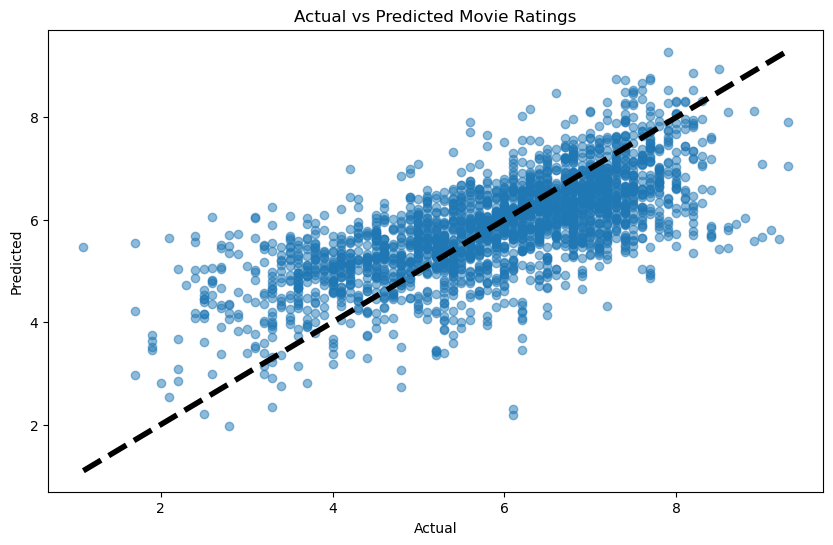

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Movie Ratings')
plt.show()

In [51]:
# Calculate residuals
residuals = y_test - y_pred

In [52]:
residuals 

6765    -0.986648
14443   -0.276563
13666    0.799677
1525    -0.315159
5689    -0.545940
           ...   
10748    0.486521
13347   -0.936315
6624     0.666170
441     -0.444477
936      0.471413
Name: Rating, Length: 2396, dtype: float64

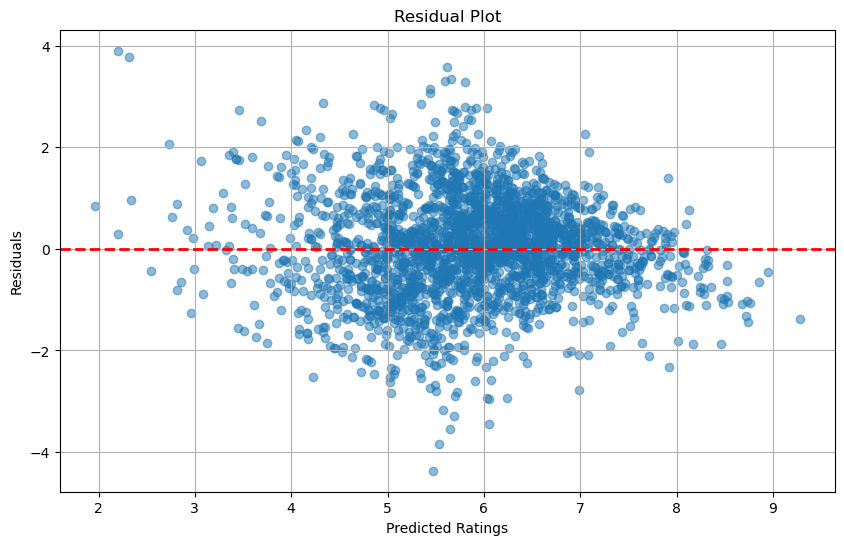

In [53]:
# Create the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()